In [1]:
import numpy as np
import pandas as pd
import os 
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
if (os.path.exists("./image")) == False:
    os.mkdir("./image/metadata")
    

files = glob.glob("./image/*.png")
for f in files:
    os.remove(f)

In [3]:
metadata = pd.read_csv("metadata.csv")

In [4]:
metadata['technology'] = metadata['technology'].apply(lambda x: 0 if x == 'citeseq' else 1)
metadata['donor'] = metadata['donor'].apply(lambda x: '1' if x == 13176 else x)
metadata['donor'] = metadata['donor'].apply(lambda x: '2' if x == 27678 else x)
metadata['donor'] = metadata['donor'].apply(lambda x: '3' if x == 31800 else x)
metadata['donor'] = metadata['donor'].apply(lambda x: '4' if x == 32606 else x)

metadata2 = pd.read_csv("metadata.csv")
metadata2['technology'] = metadata2['technology'].apply(lambda x: 1 if x == 'citeseq' else 0)
metadata2['donor'] = metadata2['donor'].apply(lambda x: '1' if x == 13176 else x)
metadata2['donor'] = metadata2['donor'].apply(lambda x: '2' if x == 27678 else x)
metadata2['donor'] = metadata2['donor'].apply(lambda x: '3' if x == 31800 else x)
metadata2['donor'] = metadata2['donor'].apply(lambda x: '4' if x == 32606 else x)

,cell_id,day,donor,cell_type,technology
52938,a4cb93368aa4,7,4,MasP,0
275854,894b3a1d0711,10,3,hidden,1
26495,326faef30090,7,2,HSC,0
259130,b733dd68bd4d,4,3,EryP,1
214416,e173e1cbe45e,4,1,NeuP,1


In [5]:
day_df = metadata.set_index("cell_id")[["day"]].value_counts().to_frame()\
                .sort_values("day").reset_index()\
                .rename(columns={0:"# cells"})

donor_df = metadata.set_index("cell_id")[["donor"]].value_counts().to_frame()\
                .sort_values("donor").reset_index()\
                .rename(columns={0:"# cells"})

cell_type_df = metadata.set_index("cell_id")[["cell_type"]].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})

tech_df = metadata.set_index("cell_id")[["technology"]].value_counts().to_frame()\
                .sort_values("technology").reset_index()\
                .rename(columns={0:"# cells"})

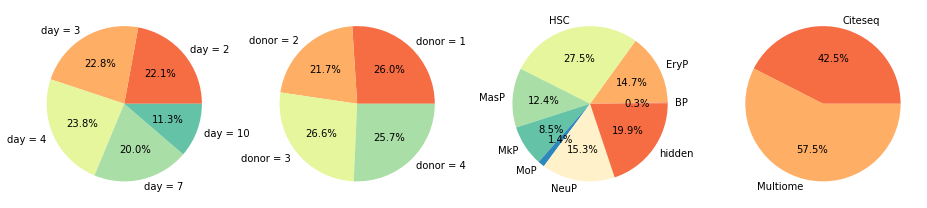

In [6]:
fig, axs = plt.subplots(1, 4, figsize=(16,4), sharey=True)

colors = ['#F66D44', '#FEAE65', '#E6F69D', '#AADEA7', '#64C2A6', '#2D87BB', '#FFF1C9']
daylabels = ["day = 2", "day = 3", "day = 4", "day = 7", "day = 10"]
donorlabels = ["donor = 1", "donor = 2", "donor = 3", "donor = 4"]

axs[0].pie(day_df['# cells'], labels = daylabels, autopct='%1.1f%%', colors=colors)
axs[1].pie(donor_df['# cells'], labels = donorlabels, colors=colors, autopct='%1.1f%%')
axs[2].pie(cell_type_df['# cells'], labels = cell_type_df['cell_type'], autopct='%1.1f%%', colors=colors)
axs[3].pie(tech_df['# cells'], labels = ['Citeseq', 'Multiome'], autopct='%1.1f%%', colors=colors)
plt.show()

fig.savefig('./image/0.0.png')

In [7]:
sns.set_theme(style="whitegrid")

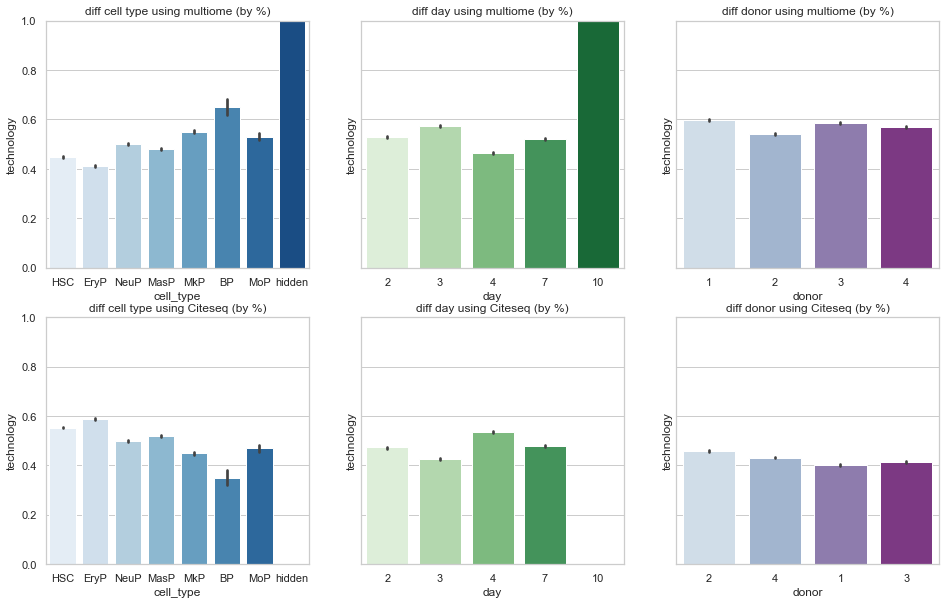

In [28]:
fig, axs = plt.subplots(2, 3, figsize=(16,10), sharey=True)
sns.barplot(x = "cell_type", y="technology", data = metadata, palette="Blues", ax = axs[0][0])
axs[0][0].set_title("diff cell type using multiome (by %)")
sns.barplot(x = "day", y="technology", data = metadata, palette="Greens", ax = axs[0][1])
axs[0][1].set_title("diff day using multiome (by %)")
sns.barplot(x = "donor", y="technology", data = metadata, palette="BuPu", ax = axs[0][2])
axs[0][2].set_title("diff donor using multiome (by %)")

g = sns.barplot(x = "cell_type", y="technology", data = metadata2, palette="Blues", ax = axs[1][0])
g.set(ylim=(0, 1))
axs[1][0].set_title("diff cell type using Citeseq (by %)")
g = sns.barplot(x = "day", y="technology", data = metadata2, palette="Greens", ax = axs[1][1])
g.set(ylim=(0, 1))
axs[1][1].set_title("diff day using Citeseq (by %)")
g = sns.barplot(x = "donor", y="technology", data = metadata2, palette="BuPu", ax = axs[1][2])
g.set(ylim=(0, 1))
axs[1][2].set_title("diff donor using Citeseq (by %)")

fig.savefig('./image/1.1.png')


In [9]:
df_cite = metadata[metadata.technology == 0]
df_multi = metadata[metadata.technology == 1]

day_df = df_cite.set_index("cell_id")[["day"]].value_counts().to_frame()\
                .sort_values("day").reset_index()\
                .rename(columns={0:"# cells"})

donor_df = df_cite.set_index("cell_id")[["donor"]].value_counts().to_frame()\
                .sort_values("donor").reset_index()\
                .rename(columns={0:"# cells"})

cell_type_df = df_cite.set_index("cell_id")[["cell_type"]].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})

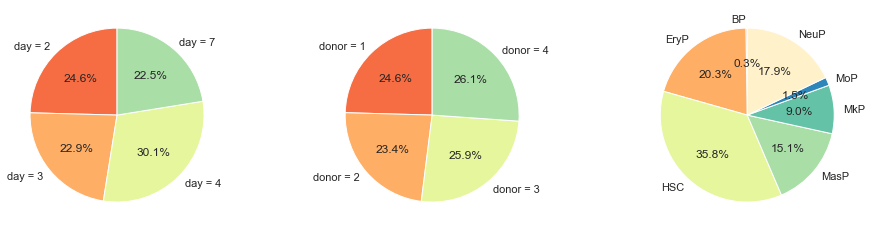

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(16,4), sharey=True)

colors = ['#F66D44', '#FEAE65', '#E6F69D', '#AADEA7', '#64C2A6', '#2D87BB', '#FFF1C9']
daylabels = ["day = 2", "day = 3", "day = 4", "day = 7"]
donorlabels = ["donor = 1", "donor = 2", "donor = 3", "donor = 4"]

axs[0].pie(day_df['# cells'], labels = daylabels, autopct='%1.1f%%', colors=colors, startangle=90)
axs[1].pie(donor_df['# cells'], labels = donorlabels, colors=colors, autopct='%1.1f%%', startangle=90)
axs[2].pie(cell_type_df['# cells'], labels = cell_type_df['cell_type'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.show()

fig.savefig('./image/0.1.png')

In [11]:
day_df = df_multi.set_index("cell_id")[["day"]].value_counts().to_frame()\
                .sort_values("day").reset_index()\
                .rename(columns={0:"# cells"})

donor_df = df_multi.set_index("cell_id")[["donor"]].value_counts().to_frame()\
                .sort_values("donor").reset_index()\
                .rename(columns={0:"# cells"})

cell_type_df = df_multi.set_index("cell_id")[["cell_type"]].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})

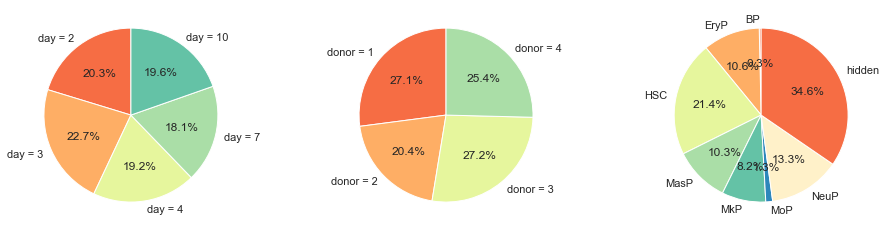

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(16,4), sharey=True)

colors = ['#F66D44', '#FEAE65', '#E6F69D', '#AADEA7', '#64C2A6', '#2D87BB', '#FFF1C9']
daylabels = ["day = 2", "day = 3", "day = 4", "day = 7", "day = 10"]
donorlabels = ["donor = 1", "donor = 2", "donor = 3", "donor = 4"]

axs[0].pie(day_df['# cells'], labels = daylabels, autopct='%1.1f%%', colors=colors, startangle=90)
axs[1].pie(donor_df['# cells'], labels = donorlabels, colors=colors, autopct='%1.1f%%', startangle=90)
axs[2].pie(cell_type_df['# cells'], labels = cell_type_df['cell_type'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.show()

fig.savefig('./image/0.2.png')

In [13]:
multi_cell = df_multi.set_index("cell_id")[["day","cell_type"]].value_counts().to_frame()\
                .sort_values("day").reset_index()\
                .rename(columns={0:"# cells"})
cite_cell = df_cite.set_index("cell_id")[["day","cell_type"]].value_counts().to_frame()\
                .sort_values("day").reset_index()\
                .rename(columns={0:"# cells"})
                
HSC_cite = cite_cell[cite_cell["cell_type"] == 'HSC']
Eryp_cite = cite_cell[cite_cell["cell_type"] == 'EryP']
BP_cite = cite_cell[cite_cell["cell_type"] == 'BP']
Neup_cite = cite_cell[cite_cell["cell_type"] == 'NeuP']
Mkp_cite = cite_cell[cite_cell["cell_type"] == 'MkP']
Masp_cite = cite_cell[cite_cell["cell_type"] == 'MasP']
Mop_cite = cite_cell[cite_cell["cell_type"] == 'MoP']

HSC_multiome = multi_cell[multi_cell["cell_type"] == 'HSC']
Eryp_multiome = multi_cell[multi_cell["cell_type"] == 'EryP']
BP_multiome = multi_cell[multi_cell["cell_type"] == 'BP']
Hidden_multiome = multi_cell[multi_cell["cell_type"] == 'hidden']
Neup_multiome = multi_cell[multi_cell["cell_type"] == 'NeuP']
Mkp_multiome = multi_cell[multi_cell["cell_type"] == 'MkP']
Masp_multiome = multi_cell[multi_cell["cell_type"] == 'MasP']
Mop_multiome = multi_cell[multi_cell["cell_type"] == 'MoP']

day_donor_CITE = df_cite.set_index("cell_id")[["day", "donor"]].value_counts().to_frame()\
                .sort_values("day").reset_index()\
                .rename(columns = {0:"number of cells"})

day_donor_Mult = df_multi.set_index("cell_id")[["day","donor"]].value_counts().to_frame()\
                .sort_values("day").reset_index()\
                .rename(columns={0:"number of cells"})

day_cell_CITE = df_cite.set_index("cell_id")[["day", "cell_type"]].value_counts().to_frame()\
                .sort_values("day").reset_index()\
                .rename(columns = {0:"number of cells"})

day_cell_Mult = df_multi.set_index("cell_id")[["day","cell_type"]].value_counts().to_frame()\
                .sort_values("day").reset_index()\
                .rename(columns={0:"number of cells"})

donor_cell_CITE = df_cite.set_index("cell_id")[["donor", "cell_type"]].value_counts().to_frame()\
                .sort_values("donor").reset_index()\
                .rename(columns = {0:"number of cells"})

donor_cell_Mult = df_multi.set_index("cell_id")[["donor","cell_type"]].value_counts().to_frame()\
                .sort_values("donor").reset_index()\
                .rename(columns={0:"number of cells"})

donor_cell_CITE['donor'] = donor_cell_CITE['donor'].apply(lambda x: 1 if x == '1' else x)
donor_cell_CITE['donor'] = donor_cell_CITE['donor'].apply(lambda x: 2 if x == '2' else x)
donor_cell_CITE['donor'] = donor_cell_CITE['donor'].apply(lambda x: 3 if x == '3' else x)
donor_cell_CITE['donor'] = donor_cell_CITE['donor'].apply(lambda x: 4 if x == '4' else x)

donor_cell_Mult['donor'] = donor_cell_Mult['donor'].apply(lambda x: 1 if x == '1' else x)
donor_cell_Mult['donor'] = donor_cell_Mult['donor'].apply(lambda x: 2 if x == '2' else x)
donor_cell_Mult['donor'] = donor_cell_Mult['donor'].apply(lambda x: 3 if x == '3' else x)
donor_cell_Mult['donor'] = donor_cell_Mult['donor'].apply(lambda x: 4 if x == '4' else x)

day_donor_CITE['donor'] = day_donor_CITE['donor'].apply(lambda x: 1 if x == '1' else x)
day_donor_CITE['donor'] = day_donor_CITE['donor'].apply(lambda x: 2 if x == '2' else x)
day_donor_CITE['donor'] = day_donor_CITE['donor'].apply(lambda x: 3 if x == '3' else x)
day_donor_CITE['donor'] = day_donor_CITE['donor'].apply(lambda x: 4 if x == '4' else x)

day_donor_Mult['donor'] = day_donor_Mult['donor'].apply(lambda x: 1 if x == '1' else x)
day_donor_Mult['donor'] = day_donor_Mult['donor'].apply(lambda x: 2 if x == '2' else x)
day_donor_Mult['donor'] = day_donor_Mult['donor'].apply(lambda x: 3 if x == '3' else x)
day_donor_Mult['donor'] = day_donor_Mult['donor'].apply(lambda x: 4 if x == '4' else x)

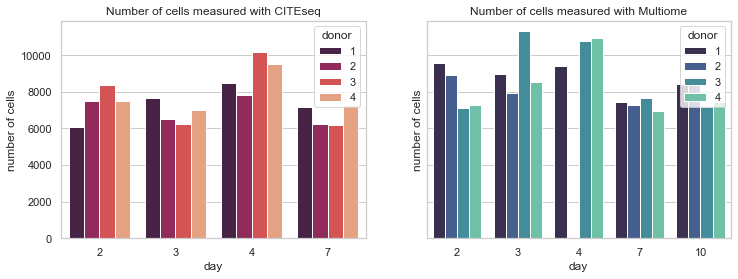

In [14]:
fig, axs = plt.subplots(1,2,figsize=(12,4), sharey=True)
sns.barplot(data = day_donor_CITE, x="day",hue="donor",y="number of cells", palette="rocket", ax = axs[0])
axs[0].set_title("Number of cells measured with CITEseq")

sns.barplot(data = day_donor_Mult, x = "day",hue = "donor",y = "number of cells", palette="mako", ax = axs[1])
axs[1].set_title("Number of cells measured with Multiome")
plt.show()
fig.savefig('./image/1.2.png')

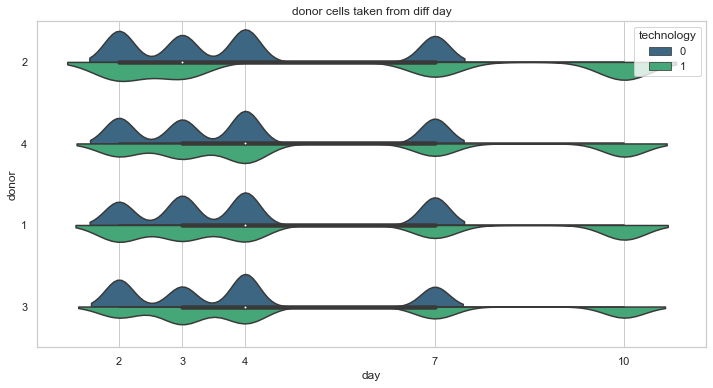

In [15]:
plt.figure(figsize = (12,6))
g = sns.violinplot(x="day", y="donor", hue="technology", data=metadata,  palette='viridis', split=True)
g.set(xticks=[2, 3, 4, 7, 10])
g.set(title='donor cells taken from diff day')
plt.show()

fig = g.get_figure()
fig.savefig('./image/1.3.png')

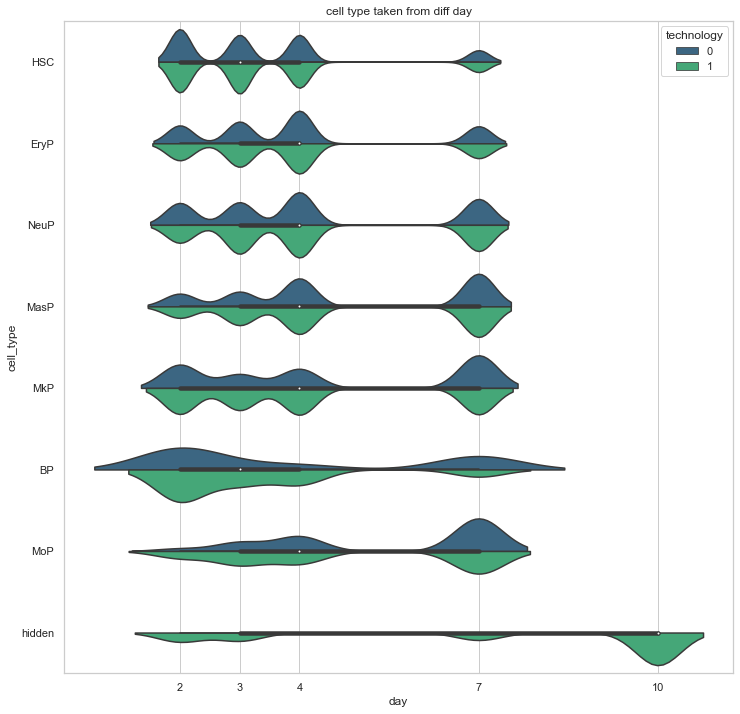

In [16]:
plt.figure(figsize = (12,12))
grid = sns.violinplot(x="day", y="cell_type", hue="technology", data=metadata,  split=True, palette='viridis')
grid.set(xticks=[2, 3, 4, 7, 10])
grid.set(title='cell type taken from diff day')
plt.show()
fig = grid.get_figure()
fig.savefig('./image/1.4.png')


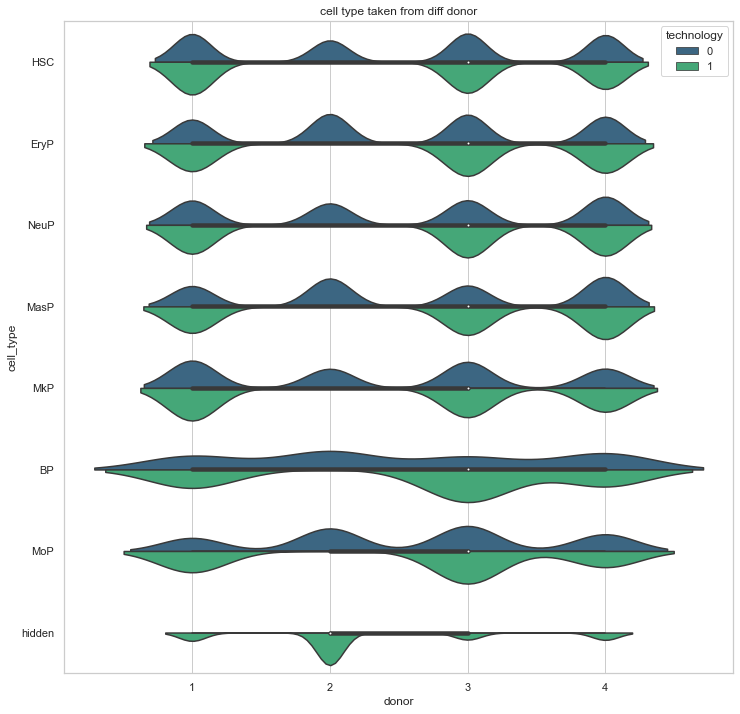

In [17]:
metadata['donor'] = metadata['donor'].apply(lambda x: 1 if x == '1' else x)
metadata['donor'] = metadata['donor'].apply(lambda x: 2 if x == '2' else x)
metadata['donor'] = metadata['donor'].apply(lambda x: 3 if x == '3' else x)
metadata['donor'] = metadata['donor'].apply(lambda x: 4 if x == '4' else x)

plt.figure(figsize = (12,12))
grid = sns.violinplot(x="donor", y="cell_type", hue="technology", data=metadata,  split=True, palette='viridis')
grid.set(xticks=[1, 2, 3, 4])
grid.set(title='cell type taken from diff donor')
plt.show()
fig = grid.get_figure()
fig.savefig('./image/1.5.png')

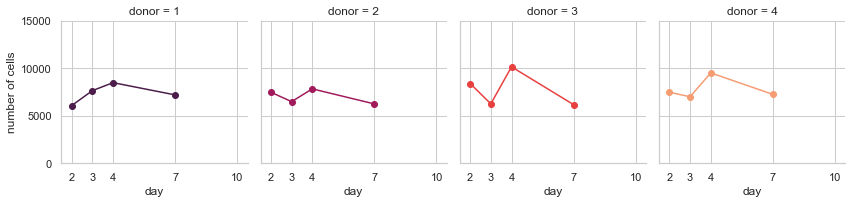

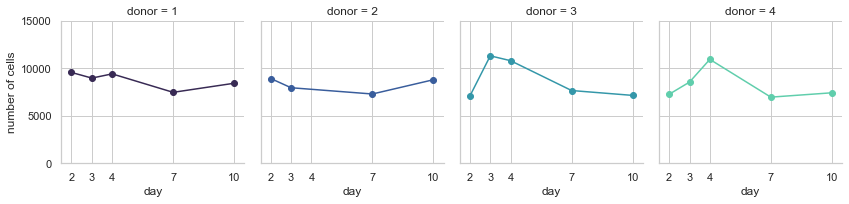

In [18]:
grid = sns.FacetGrid(day_donor_CITE, col="donor", hue="donor", palette="rocket", col_wrap=4)
grid.map(plt.plot, "day", "number of cells", marker="o")
grid.set(xticks=[2, 3, 4, 7, 10] , yticks=[0, 5000, 10000, 15000], xlim=(1.5, 10.5), ylim=(0, 15000))

plt.show()
grid.savefig('./image/2.1.1.png')
grid = sns.FacetGrid(day_donor_Mult, col="donor", hue="donor", palette="mako", col_wrap=4)
grid.map(plt.plot, "day", "number of cells", marker="o")
grid.set(xticks=[2, 3, 4, 7, 10] , yticks=[0, 5000, 10000, 15000], xlim=(1.5, 10.5), ylim=(0, 15000))

plt.show()

grid.savefig('./image/2.1.2.png')

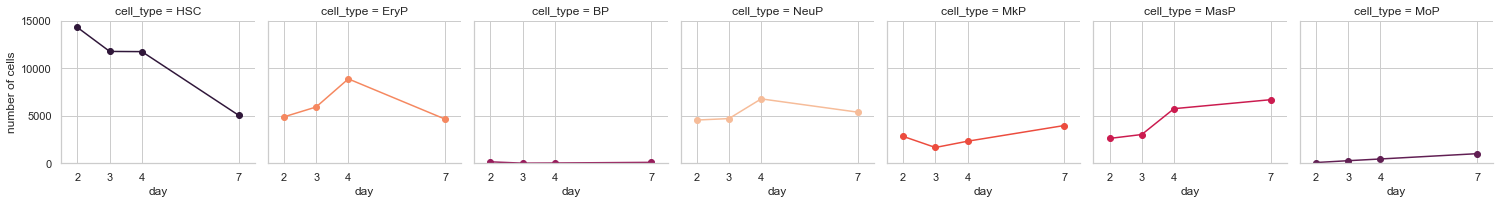

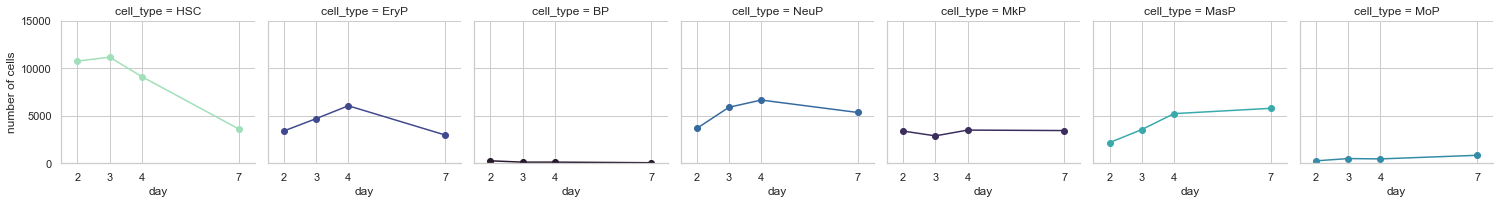

In [19]:
grid = sns.FacetGrid(day_cell_CITE, col = "cell_type", hue = "cell_type", palette = "rocket", col_wrap = 7, col_order=['HSC', 'EryP', 'BP', 'NeuP', 'MkP', 'MasP', 'MoP'])
grid.map(plt.plot, "day", "number of cells", marker="o")
grid.set(xticks=[2, 3, 4, 7] , yticks=[0, 5000, 10000, 15000], xlim=(1.5, 7.5), ylim=(0, 15000))
plt.show()

grid.savefig('./image/2.2.1.png')

grid = sns.FacetGrid(day_cell_Mult, col = "cell_type", hue = "cell_type", palette = "mako", col_wrap = 7, col_order=['HSC', 'EryP', 'BP', 'NeuP', 'MkP', 'MasP', 'MoP'])
grid.map(plt.plot, "day", "number of cells", marker="o")
grid.set(xticks=[2, 3, 4, 7] , yticks=[0, 5000, 10000, 15000], xlim=(1.5, 7.5), ylim=(0, 15000))
plt.show()

grid.savefig('./image/2.2.2.png')

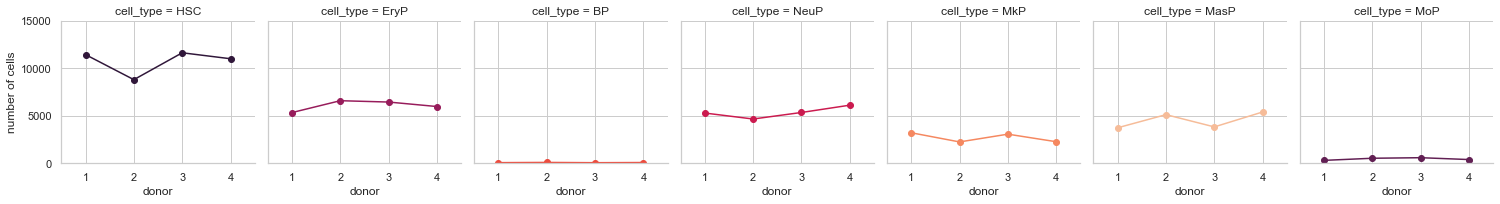

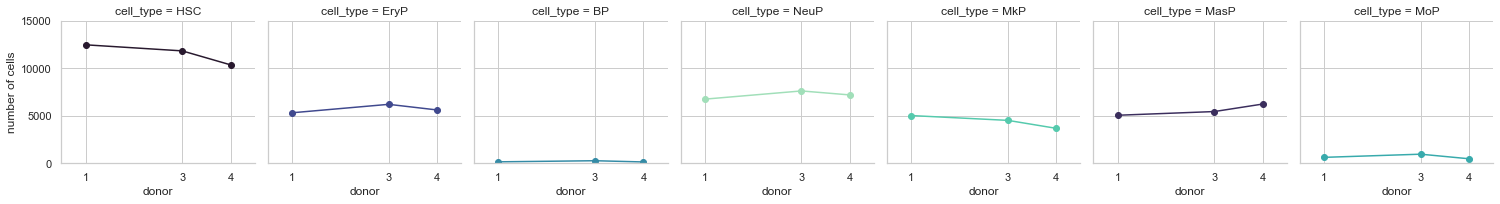

In [20]:
grid = sns.FacetGrid(donor_cell_CITE, col = "cell_type", hue = "cell_type", palette = "rocket", col_wrap = 7, col_order=['HSC', 'EryP', 'BP', 'NeuP', 'MkP', 'MasP', 'MoP'])
grid.map(plt.plot, "donor", "number of cells", marker="o")
grid.set(xticks=[1, 2, 3, 4] , yticks=[0, 5000, 10000, 15000], xlim=(0.5, 4.5), ylim=(0, 15000))
plt.show()
grid.savefig('./image/2.3.1.png')
grid = sns.FacetGrid(donor_cell_Mult, col = "cell_type", hue = "cell_type", palette = "mako", col_wrap = 7, col_order=['HSC', 'EryP', 'BP', 'NeuP', 'MkP', 'MasP', 'MoP'])
grid.map(plt.plot, "donor", "number of cells", marker="o")
grid.set(xticks=[1, 3, 4] , yticks=[0, 5000, 10000, 15000], xlim=(0.5, 4.5), ylim=(0, 15000))
plt.show()
grid.savefig('./image/2.3.2.png')
